!pip3 install seaborn

I couldn't execute all the the utility programs you provided in HW4. So I went ahead and loaded the Bike Sahre data from pronto-data website.

In [4]:
!pip install seaborn
!pip install python-utils

In [1]:
!curl -O https://s3.amazonaws.com/pronto-data/open_data_year_two.zip
!unzip open_data_year_two.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5627k  100 5627k    0     0  1892k      0  0:00:02  0:00:02 --:--:-- 1993k
Archive:  open_data_year_two.zip
replace 2016_trip_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


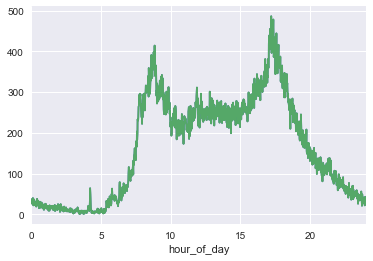

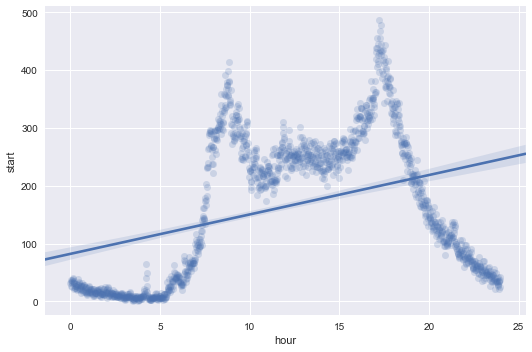

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
bikes = pd.read_csv('2016_trip_data.csv',parse_dates=['starttime', 'stoptime'],
                    infer_datetime_format=True)

bikes['start'] = pd.to_datetime(bikes['starttime'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['stoptime'], infer_datetime_format=True)
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute/60).round(2))
bikes.head()

hours = bikes.groupby('hour_of_day').agg('count')
hours['hour'] = hours.index

hours.start.plot()


hours.start.plot()
sns.lmplot(x='hour', y='start', data=hours, aspect=1.5, scatter_kws={'alpha':0.2})

1. Create 3 models fit to hour_of_day with varying polynomial degrees

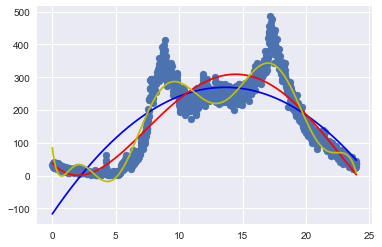

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import numpy as np
poly = PolynomialFeatures(degree=2)
x = np.array(hours['hour']).reshape(-1,1)
y = np.array(hours['start'])
x2 = poly.fit_transform(x)
M1 = linear_model.LinearRegression()
M1.fit(x2, y)
(M1.intercept_,M1.coef_)

poly = PolynomialFeatures(degree=4)

x4 = poly.fit_transform(x)
M2 = linear_model.LinearRegression()
M2.fit(x4, y)
(M2.intercept_,M2.coef_)

poly = PolynomialFeatures(degree=10)
x10 = poly.fit_transform(x)
M3 = linear_model.LinearRegression()
M3.fit(x10, y)
(M3.intercept_,M3.coef_)

plt.scatter (x,y)
plt.plot(x,np.dot(x2,M1.coef_)+M1.intercept_,c='b')
plt.plot(x,np.dot(x4,M2.coef_)+M2.intercept_,c='r')
plt.plot(x,np.dot(x10,M3.coef_)+M3.intercept_,c='y')




Choose one of the polynomial models and create 3 new models fit to hour_of_day with different Ridge Regression $\alpha$ (alpha) Ridge Coefficient values

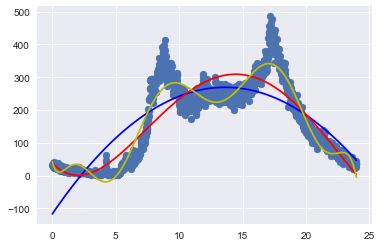

In [4]:
M1r = linear_model.Ridge(alpha = 0.1)
M1r.fit(x2, y)
(M1r.intercept_,M1r.coef_)

poly = PolynomialFeatures(degree=4)
M2r = linear_model.Ridge(alpha = 0.5)
M2r.fit(x4, y)
(M2r.intercept_,M2r.coef_)


M3r = linear_model.Ridge(alpha = 0.6)
M3r.fit(x10, y)
(M3r.intercept_,M3r.coef_)

plt.scatter (x,y)
plt.plot(x,np.dot(x2,M1r.coef_)+M1r.intercept_,c='b')
plt.plot(x,np.dot(x4,M2r.coef_)+M2r.intercept_,c='r')
plt.plot(x,np.dot(x10,M3r.coef_)+M3r.intercept_,c='y')



0.1
(73.653874953652519, array([  0.00000000e+00,  -2.59842321e+02,   3.25978778e+02,
        -1.70658367e+02,   4.50080432e+01,  -6.65883267e+00,
         5.88657968e-01,  -3.17775732e-02,   1.02632952e-03,
        -1.82067736e-05,   1.36343847e-07]))
1281.73694429


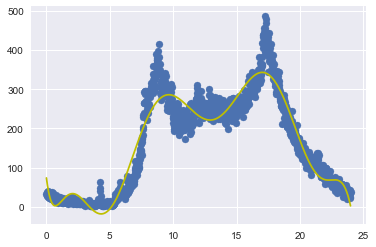

In [10]:
from sklearn import cross_validation
import numpy as np
from sklearn.metrics import mean_squared_error
alphas = 10**np.linspace(10,-2,100)*0.5
X_train, X_test , y_train, y_test = cross_validation.train_test_split(x10, y, test_size=0.5, random_state = 1)
ridgecv = linear_model.RidgeCV()
ridgecv.fit(X_train, y_train)
print(ridgecv.alpha_)
M3r = linear_model.Ridge(alpha =ridgecv.alpha_ )
M3r.fit(x10, y)
print((M3r.intercept_,M3r.coef_))

plt.scatter (x,y)
plt.plot(x,np.dot(x10,M3r.coef_)+M3r.intercept_,c='y')

pred2 = M3r.predict(X_test)
print(mean_squared_error(y_test, pred2))





0.1
(38.144887182994069, array([  0.00000000e+00,  -3.96226930e+01,   1.18274210e+01,
        -7.08852053e-01,   1.17575804e-02]))
3395.06064824


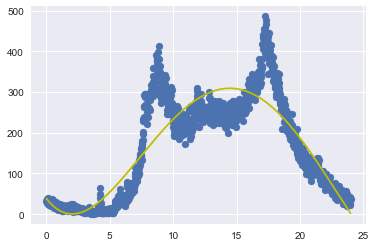

In [12]:
from sklearn import cross_validation
import numpy as np
from sklearn.metrics import mean_squared_error
alphas = 10**np.linspace(10,-2,100)*0.5
X_train, X_test , y_train, y_test = cross_validation.train_test_split(x4, y, test_size=0.5, random_state = 1)
ridgecv = linear_model.RidgeCV()
ridgecv.fit(X_train, y_train)
print(ridgecv.alpha_)
M2r = linear_model.Ridge(alpha =ridgecv.alpha_ )
M2r.fit(x4, y)
print((M2r.intercept_,M2r.coef_))

plt.scatter (x,y)
plt.plot(x,np.dot(x4,M2r.coef_)+M2r.intercept_,c='y')

pred1 = M2r.predict(X_test)
print(mean_squared_error(y_test, pred1))

Based on the MSE, I favor a modet with 10 polynomial degree, although the model with 4 degress is parsimunious